<h1 style='text-align:center; font-weight:bold'>
    Estadística Descriptiva
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

## **Datos**

In [4]:
df = pd.read_csv('Data/cars.csv')

In [5]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


## **Medidas de Tendencia Central**

### **Estadisticas descriptivas**

In [6]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [7]:
# Promedio
round(df['price_usd'].mean(), 2)

6639.97

In [8]:
# Mediana
df['price_usd'].median()

4800.0

In [9]:
# Estadisticas descriptivas de una variable
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

### **Análisis gráfico**

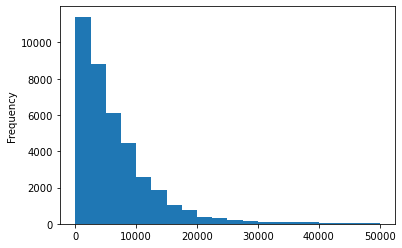

In [11]:
# Histograma
df['price_usd'].plot.hist(bins=20)

plt.show()

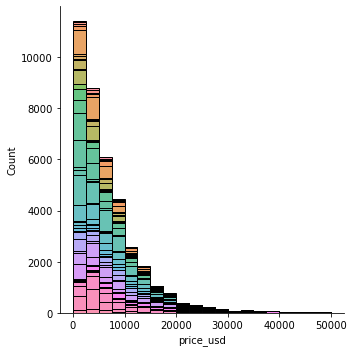

In [17]:
# Histograma agrupado
sns.displot(df, x='price_usd', hue='manufacturer_name', multiple='stack', legend=False, bins=20)
plt.show()

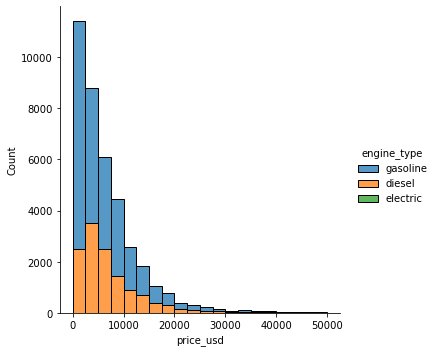

In [13]:
# Histograma agrupado
sns.displot(df, x='price_usd', hue='engine_type', multiple='stack', bins=20)
plt.show()

In [19]:
# Tabla de frecuencia
df.groupby('engine_type')[['manufacturer_name']].count().reset_index()

,engine_type,manufacturer_name
0,diesel,12874
1,electric,10
2,gasoline,25647


**Conociendo la distribución de una consulta concreta**

In [23]:
Q7_df = df.query('manufacturer_name == "Audi" & model_name == "Q7"')

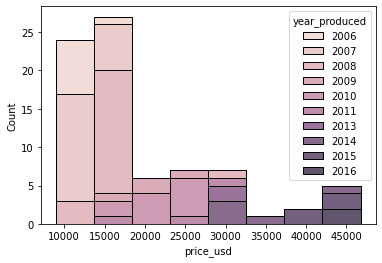

In [24]:
sns.histplot(Q7_df, x='price_usd', hue='year_produced',multiple='stack')
plt.show()

## **Medidas de Dispersión**

In [25]:
# Desviación estandar
round(df['price_usd'].std(),2)

6428.15

In [26]:
# Rango
rango = df['price_usd'].max() - df['price_usd'].min() 
rango

49999.0

In [27]:
# Quartiles
min_value = df['price_usd'].quantile(q=0)

Q1 = df['price_usd'].quantile(q=0.25)
Q2 = df['price_usd'].median()
Q3 = df['price_usd'].quantile(q=0.75)

max_value = df['price_usd'].quantile(q=1)

In [28]:
min_value, Q1, Q2, Q3, max_value

(1.0, 2100.0, 4800.0, 8990.0, 50000.0)

In [29]:
#Rango interquartil
iqr = Q3-Q1
iqr

6890.0

### **Detección de outliers**

In [30]:
minlimit = Q1 - (1.5*iqr)
maxlimit = Q3 + (1.5*iqr)

In [31]:
minlimit, maxlimit

(-8235.0, 19325.0)

### **Diagrama de caja**

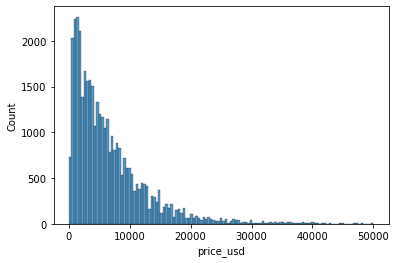

In [35]:
sns.histplot(df['price_usd'])
plt.show()

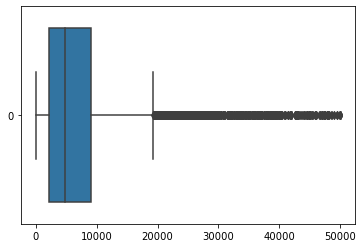

In [34]:
sns.boxplot(data = df['price_usd'], orient='horizontal')
plt.show()

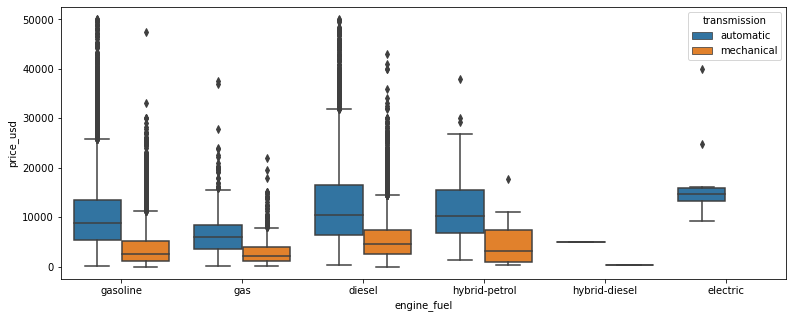

In [43]:
plt.figure(figsize=(13,5))

sns.boxplot(data=df, x='engine_fuel', y='price_usd', hue='transmission')

plt.show()